# Preparación de datos <a class="tocSkip">
### Laura Cristina López Bedoya <a class="tocSkip">
### Base de datos: datos_credito_alemania.csv <a class="tocSkip">

In [301]:
# Importar librerias para la preparación y visualización de los datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [302]:
#Leer la base de datos
datos = pd.read_csv('datos_credito_alemania.csv')
datos.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0.0,67.0,male,2.0,own,NaN,little,1169.0,6.0,radio/TV,good
1,1.0,22.0,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,2.0,49.0,male,1.0,own,little,NaN,2096.0,12.0,education,good
3,3.0,45.0,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,4.0,53.0,male,2.0,free,little,little,4870.0,24.0,car,bad


## Información de la tabla
#### En este dataset, cada fila representa a una persona que toma un crédito de un banco. Cada persona se clasifica como riesgos de crédito buenos o malos según el conjunto de atributos. La idea es crear un sistema con aprendizaje de maquina que permita determinar si un cliente es un riesgo bueno o malo para prestarle dinero.

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### DATOS DE SALIDA:
- Risk - good or bad

## Descripción de datos

In [303]:
datos.dtypes #Conocer de que tipo son las variables
#Variables tipo object son categoricas
#Variables tipo float64 son numericas

Unnamed: 0          float64
Age                 float64
Sex                  object
Job                 float64
Housing              object
Saving accounts      object
Checking account     object
Credit amount       float64
Duration            float64
Purpose              object
Risk                 object
dtype: object

In [304]:
datos.shape #Número de filas y columnas del dataset.

(1062, 11)

In [305]:
datos.describe() #Descripción de los datos numéricos del dataset.

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1061.000000,1058.000000,1055.000000,1055.000000,1056.000000
mean,499.549482,35.483932,1.906161,3269.879621,20.942235
std,281.273262,11.285586,0.648828,2800.110643,12.091573
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,265.000000,27.000000,2.000000,1364.000000,12.000000
50%,502.000000,33.000000,2.000000,2320.000000,18.000000
75%,734.000000,42.000000,2.000000,3984.500000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [306]:
datos.dropna().shape #Si se eliminan las filas y columnas donde hay datos faltantes el tamaño del dataset se reduce a:

(535, 11)

In [307]:
datos.info() # Información general de los datos de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 11 columns):
Unnamed: 0          1061 non-null float64
Age                 1058 non-null float64
Sex                 1052 non-null object
Job                 1055 non-null float64
Housing             1052 non-null object
Saving accounts     862 non-null object
Checking account    635 non-null object
Credit amount       1055 non-null float64
Duration            1056 non-null float64
Purpose             1051 non-null object
Risk                1046 non-null object
dtypes: float64(5), object(6)
memory usage: 91.3+ KB


## Visualización de datos

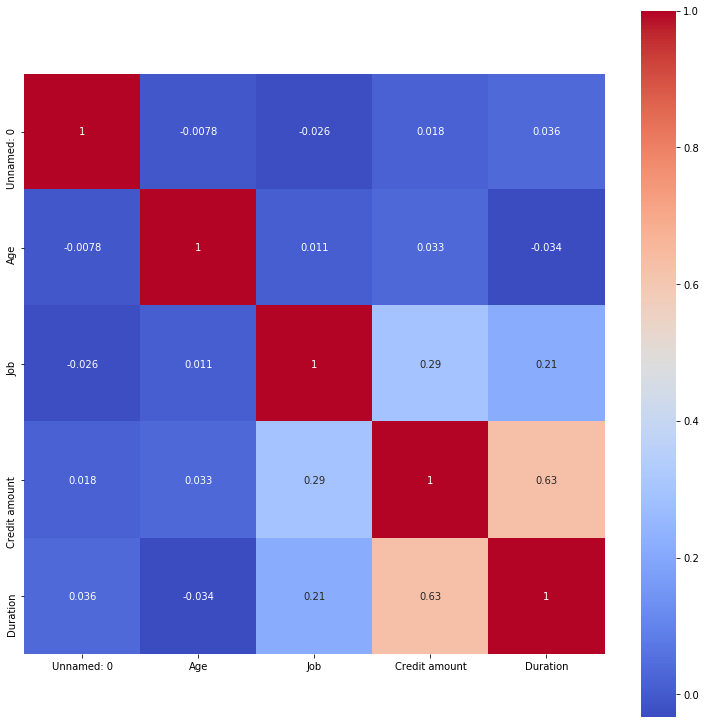

In [308]:
plt.figure(figsize=(13,13)) #Gráfica de correlación de las variables del dataset
sns.heatmap(datos.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()
#Ninguna variable tiene correlacción con otra mayor a 0.7

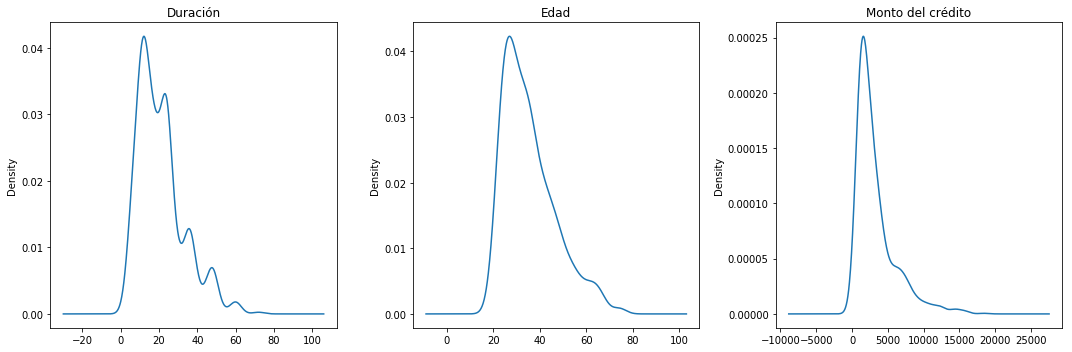

In [309]:
plt.figure(figsize=(15,5))
      
plt.subplot(131)
datos['Duration'].plot.kde();
plt.title("Duración")

plt.subplot(132)
datos['Age'].plot.kde();
plt.title("Edad")

plt.subplot(133)
datos['Credit amount'].plot.kde();
plt.title("Monto del crédito");

plt.tight_layout()

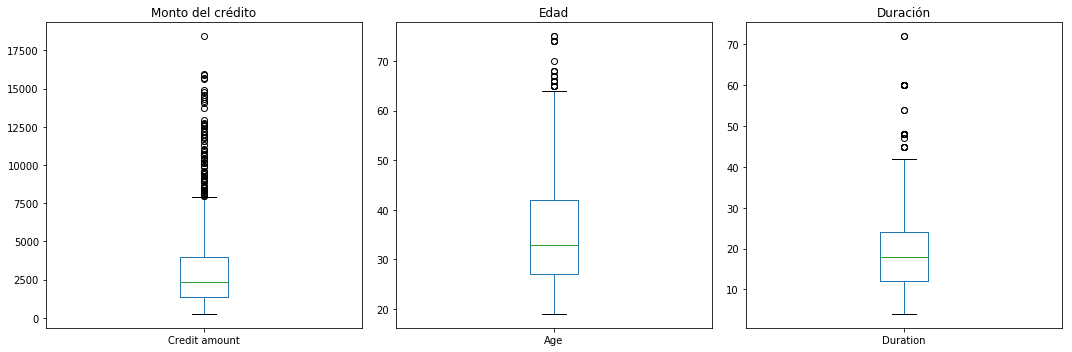

In [310]:
plt.figure(figsize=(15,5))
      
plt.subplot(131)
datos['Credit amount'].plot.box(); #Visualización del monto del crédito que solicita una persona
plt.title("Monto del crédito");

plt.subplot(132)
datos['Age'].plot.box(); #Visualización de la edad de las personas que solicitan un crédito
plt.title("Edad");

plt.subplot(133)
datos['Duration'].plot.box(); #Visualización del monto del crédito que solicita una persona
plt.title("Duración");

plt.tight_layout()

- Se observan valores atípicos superiores a 5500 aproximadamente en la visualización del monto del crédito que solicita una persona.
- Se observan datos atípicos superiores a 59 en la visualización de la edad de las personas que solicitan un crédito.
- Se observan datos atípicos superiores a 42 en la visualización del monto del crédito que solicita una persona.

Estos valores no estas muy alejados de los reales y por lo tanto dependiendo del caso se pueden considerar atípicos o no.

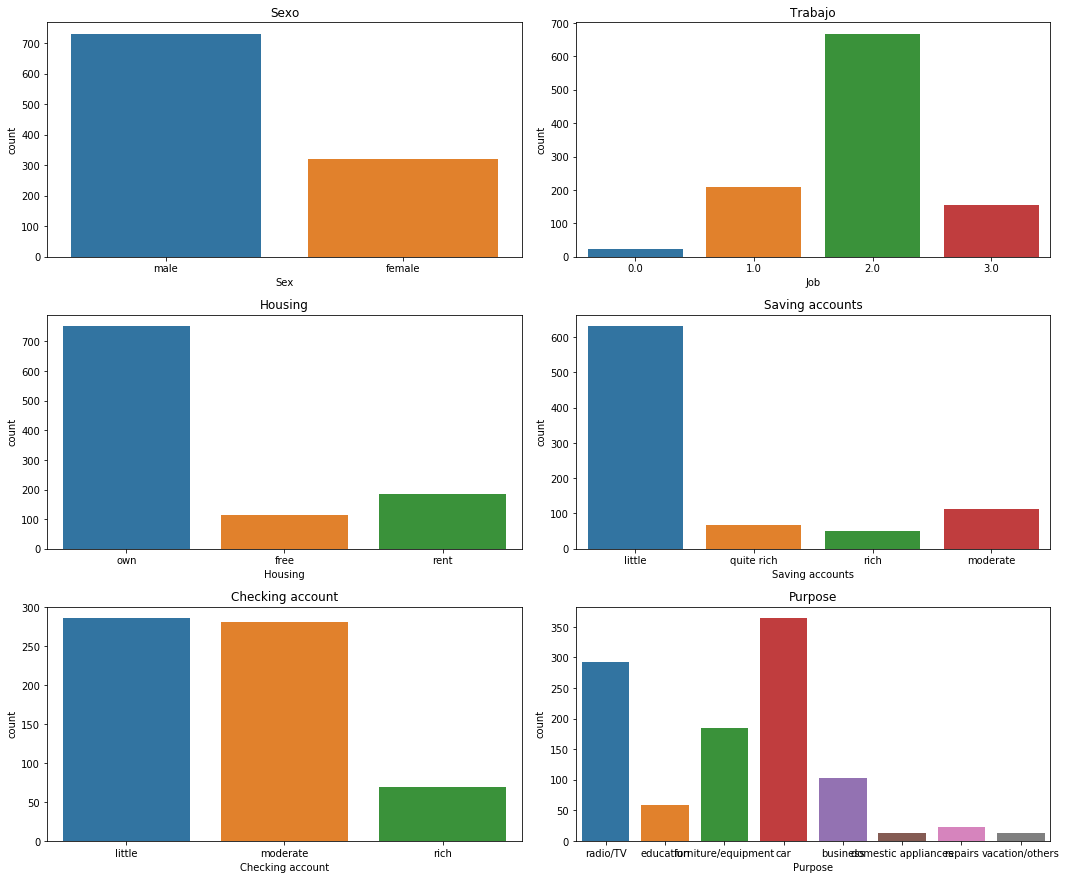

In [311]:
plt.figure(figsize=(15,20))
      
plt.subplot(521)
sns.countplot(x='Sex',data=datos); #Visualización del sexo de las personas que desean adquirir un crédito
plt.title("Sexo");

plt.subplot(522)
sns.countplot(x='Job',data=datos); #Visualización del desempeño de las personas en su trabajo
plt.title("Trabajo");

plt.subplot(523)
sns.countplot(x='Housing',data=datos); #Visualización del alojamiento
plt.title("Housing");

plt.subplot(524)
sns.countplot(x='Saving accounts',data=datos); #Visualización de la cuenta de ahorros
plt.title("Saving accounts");

plt.subplot(525)
sns.countplot(x='Checking account',data=datos); #Visualización de la cuenta corriente
plt.title("Checking account");

plt.subplot(526)
sns.countplot(x='Purpose',data=datos); #Visualización del propósito
plt.title("Purpose");

plt.tight_layout()

- Los hombres realizan más tramites para un crédito que las mujeres.
- El número de personas que estan calificadas es superior.

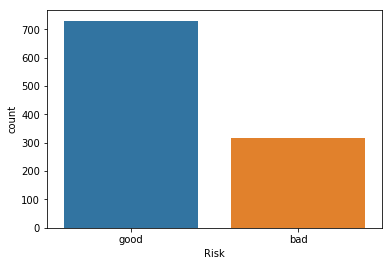

In [312]:
sns.countplot(x='Risk',data=datos); #Visualización del riesgo

- Se observa que la probabilidad de que el riesgo sea bajo es mayor a la probabilidad de que el riesgo sea alto al momento de prestar un crédito

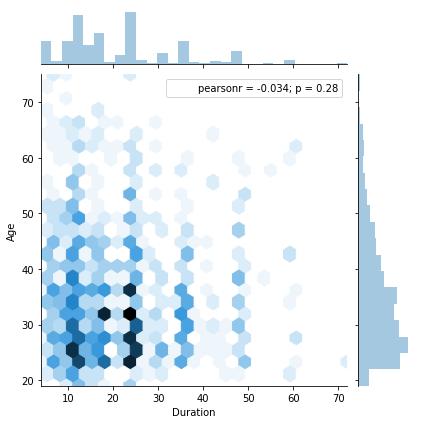

In [313]:
sns.jointplot(x='Duration',y='Age',data=datos,kind='hex'); 
#Duración del crédito vs edad de la persona que solicitó el crédito

- Se observa que la edad no depende de la duración del crédito realizado.

## Preparación de datos
#### Transformación de variables

In [314]:
datos['Credit amount'].quantile([0.1,0.5,0.9,0.925,1]) 
#Se buscan los cuartiles para definir el valor por el cual reemplzar los valores atípicos

0.100      936.40
0.500     2320.00
0.900     7150.40
0.925     7811.45
1.000    18424.00
Name: Credit amount, dtype: float64

In [315]:
datos['Age'].quantile([0.1,0.5,0.9,0.96,1])
#Se buscan los cuartiles para definir el valor por el cual reemplzar los valores atípicos

0.10    23.0
0.50    33.0
0.90    52.0
0.96    61.0
1.00    75.0
Name: Age, dtype: float64

In [316]:
datos['Duration'].quantile([0.1,0.5,0.9,0.93,1])
#Se buscan los cuartiles para definir el valor por el cual reemplzar los valores atípicos

0.10     9.0
0.50    18.0
0.90    36.0
0.93    42.0
1.00    72.0
Name: Duration, dtype: float64

In [317]:
#Se cambian los datos atípicos de las variables Credit amount, Age y Duration
#Con el cuartil 0.925 se puede calcular el valor aproximado de la linea del boxplot
for x in range (0,len(datos)):
    if datos['Credit amount'][x] > 7811.45:
        datos['Credit amount'][x] = 7811.45
        
#Con el cuartil 0.93 se puede calcular el valor aproximado de la linea del boxplot              
for z in range (0,len(datos)):
     if datos['Duration'][z] > 42:
              datos['Duration'][z] = 42
                
#Con el cuartil 0.96 se puede calcular el valor aproximado de la linea del boxplot
for z in range (0,len(datos)):
      if datos['Age'][z] > 61:
            datos['Age'][z] = 61
            
import warnings
warnings.filterwarnings('ignore')

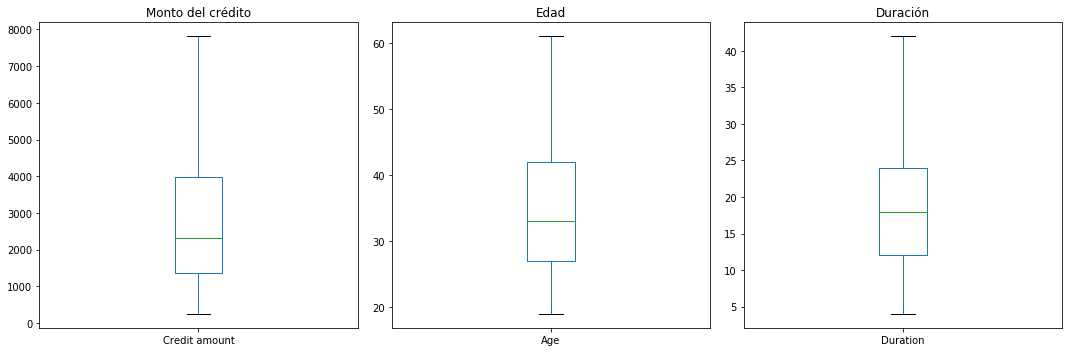

In [318]:
#Visualización de los boxplot con la reducción de datos atípicos
plt.figure(figsize=(15,5))
      
plt.subplot(131)
datos['Credit amount'].plot.box(); #Visualización del monto del crédito que solicita una persona
plt.title("Monto del crédito");

plt.subplot(132)
datos['Age'].plot.box(); #Visualización de la edad de las personas que solicitan un crédito
plt.title("Edad");

plt.subplot(133)
datos['Duration'].plot.box(); #Visualización del monto del crédito que solicita una persona
plt.title("Duración");

plt.tight_layout()

In [319]:
datos['Unnamed: 0'].duplicated() #Verificar si hay datos duplicados. Se selecciona el identificador de usuario para la comparación.

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1032     True
1033     True
1034     True
1035     True
1036     True
1037     True
1038     True
1039     True
1040     True
1041     True
1042     True
1043    False
1044     True
1045     True
1046     True
1047     True
1048     True
1049     True
1050     True
1051     True
1052     True
1053     True
1054     True
1055     True
1056     True
1057     True
1058     True
1059     True
1060     True
1061     True
Name: Unnamed: 0, Length: 1062, dtype: bool

In [320]:
datos[datos['Unnamed: 0']==419.0] #Se verifica que los datos estan duplicados. 
#En este ejemplo los datos de la fila 519 y 1058 del dataset estan duplicados

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
419,419.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad
1058,419.0,33.0,female,2.0,own,NaN,moderate,1042.0,18.0,car,bad


In [321]:
datos.drop_duplicates(['Unnamed: 0'], keep='last', inplace=True) #Se eliminan las filas que contienen datos duplicados. keep='last' se deja la ultima fila que esta duplicada, ya que en la mayoria de los casos contiene más información.

In [322]:
datos.shape #Eliminando los datos duplicados, el tamaño del dataset se reduce a: (Se eliminaron 61 filas)

(1001, 11)

In [323]:
datos['Unnamed: 0'].value_counts() #Se verifica que no se encuentren datos duplicados

673.0    1
327.0    1
274.0    1
913.0    1
278.0    1
618.0    1
282.0    1
262.0    1
435.0    1
266.0    1
835.0    1
828.0    1
341.0    1
820.0    1
812.0    1
804.0    1
557.0    1
809.0    1
780.0    1
594.0    1
772.0    1
764.0    1
487.0    1
756.0    1
695.0    1
732.0    1
461.0    1
724.0    1
716.0    1
287.0    1
        ..
968.0    1
476.0    1
952.0    1
920.0    1
904.0    1
872.0    1
856.0    1
402.0    1
824.0    1
808.0    1
498.0    1
776.0    1
760.0    1
668.0    1
728.0    1
712.0    1
980.0    1
680.0    1
648.0    1
972.0    1
632.0    1
600.0    1
964.0    1
584.0    1
552.0    1
956.0    1
536.0    1
492.0    1
948.0    1
0.0      1
Name: Unnamed: 0, Length: 1000, dtype: int64

### Transformación de datos

In [324]:
datos.dropna().shape #Si se eliminan las filas y columnas donde hay datos faltantes el tamaño del dataset se reduce a:

(522, 11)

In [325]:
datos.isnull().any(axis=0) #Verificar si las columnas tienen datos nulos

Unnamed: 0           True
Age                  True
Sex                  True
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [326]:
#Se verifica cuantas variables nulas tiene cada columna
a = datos['Age'].isnull().value_counts() 
b = datos['Sex'].isnull().value_counts() 
c = datos['Saving accounts'].isnull().value_counts() 
d = datos['Unnamed: 0'].isnull().value_counts()
e = datos['Checking account'].isnull().value_counts()
print('Unnamed: 0 \n',d)
print('Age: \n',a)
print('Sex: \n',b)
print('Saving accounts: \n',c)
print('Checking account: \n',e)

Unnamed: 0 
 False    1000
True        1
Name: Unnamed: 0, dtype: int64
Age: 
 False    1000
True        1
Name: Age, dtype: int64
Sex: 
 False    1000
True        1
Name: Sex, dtype: int64
Saving accounts: 
 False    817
True     184
Name: Saving accounts, dtype: int64
Checking account: 
 False    607
True     394
Name: Checking account, dtype: int64


In [327]:
#Verificar cual es el dato que más se repite en cada columna categórica
f = datos['Sex'].mode() 
g = datos['Saving accounts'].mode()
h = datos['Checking account'].mode()
print('Sex \n',f)
print('Saving accounts: \n',g)
print('Checking account: \n',h)

Sex 
 0    male
dtype: object
Saving accounts: 
 0    little
dtype: object
Checking account: 
 0    little
dtype: object


In [328]:
#Llenar los datos nulos de la columna Age con la media, de esta manera no se altera la estadística de los datos
datos['Age'] = datos['Age'].fillna(datos['Age'].median()) 

#Llenar los datos nulos de las columna Sex y Saving accounts con la moda, es decir, con el dato que más acurrencias tiene
datos['Sex'] = datos['Sex'].fillna('male')
datos['Saving accounts'] = datos['Saving accounts'].fillna('little')

In [329]:
datos.isnull().any(axis=0) #Verificar si las columnas tienen datos nulos

Unnamed: 0           True
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [330]:
#Eliminar columnas con datos irrelevantes para el análisis
datos = datos.drop(['Checking account'],axis=1) 
datos.head()
#Se elimina la cuenta corriente (Checking account). Esta variable se tiene en cuenta cuando un cliente tiene una gran cantidad de dinero, sin embargo esta columna cuenta con muchos datos vacíos y puede dañar la predicción si se llena con la moda.

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,0.0,61.0,male,2.0,own,little,1169.00,6.0,radio/TV,good
1,1.0,22.0,female,2.0,own,little,5951.00,42.0,radio/TV,bad
2,2.0,49.0,male,1.0,own,little,2096.00,12.0,education,good
3,3.0,45.0,male,2.0,free,little,7811.45,42.0,furniture/equipment,good
4,4.0,53.0,male,2.0,free,little,4870.00,24.0,car,bad


In [331]:
datos.isnull().any(axis=0) #Verificar si hay datos nulos

Unnamed: 0          True
Age                False
Sex                False
Job                False
Housing            False
Saving accounts    False
Credit amount      False
Duration           False
Purpose            False
Risk               False
dtype: bool

In [332]:
#Se elimina el dato nulo que tiene la variable Unnamed: 0, ya que esta representa identificación de usuario y no es posible reemplazarlo por un valor medio.
#Si hay un dato nulo se elimina y el tamaño del dataset se reduce a:
datos.dropna(inplace=True) 
datos.shape

(1000, 10)

In [333]:
datos.isnull().any(axis=0) #Verificar si hay datos nulos

Unnamed: 0         False
Age                False
Sex                False
Job                False
Housing            False
Saving accounts    False
Credit amount      False
Duration           False
Purpose            False
Risk               False
dtype: bool

In [334]:
datos['Job'].dtypes

dtype('float64')

In [335]:
#Convertir de numérico a categórica la columna Job
#Es 1 si cumple la condicion y es 0 si no la cumple
#Esto se hace con el fin de poner las variables en un lenguaje que la máquina pueda entender para luego aplicar algoritmos.
dummy_cols = 'Job'.split(",")
df2 = pd.get_dummies(datos, columns=dummy_cols)
cols = [c for c in df2.columns if c not in dummy_cols]
datos = df2[cols]

In [336]:
#Se verifica que no falta algún dato
datos.isnull().any(axis=0).any()

False

In [337]:
datos.head() #Este es el dataset final

,Unnamed: 0,Age,Sex,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk,Job_0.0,Job_1.0,Job_2.0,Job_3.0
0,0.0,61.0,male,own,little,1169.00,6.0,radio/TV,good,0,0,1,0
1,1.0,22.0,female,own,little,5951.00,42.0,radio/TV,bad,0,0,1,0
2,2.0,49.0,male,own,little,2096.00,12.0,education,good,0,1,0,0
3,3.0,45.0,male,free,little,7811.45,42.0,furniture/equipment,good,0,0,1,0
4,4.0,53.0,male,free,little,4870.00,24.0,car,bad,0,0,1,0
